# Project 2D Final Project

## BIMM 143 SP22 A00                                                                                              

### Sohail Ahmed (A17201798)

## Introduction

### Scientific Question: 
- How does the regulation of oncogenes (e.g., EGFR, AKAP14, MEGF11, etc.) differ in metastasized pediatric CNS tumor tissue versus normal CNS tissue, and are there specific CNS cancers (i.e., astrocytoma/pilocytic, ependymoma, glioblastoma, and medulloblastoma) that correlate with said oncogene regulation. 

### Background:

- For the metastasis of central nervous system (CNS) cancers (and cancers in general), the gene expression and regulation of oncogenes, genes that underwent consecutive mutations leading to the uncontrolled formation of cancerous cells, plays a vital role in the posibility that a cancer is to metastasis (i.e., invade and grow) in secondary regions of the body. This subsequently leads to the metastasis and formation of cancerous tumor tissue in other regions of the body; and of which, cancer metastasis in the CNS can be especially fatal due to the difficulty of treatment and recovery from the ailment. And so, it is paramount to understand how the oncogene regulation of cancerous tissue (CNS or otherwise) can induce the metastasis of tumors elsewhere in the body.


- In a 2013 study of the immunophenotypes for pediatric CNS cancer (linked here: https://europepmc.org/article/MED/24078694), the authors collected and analyzed patient samples to determine the gene expression/regulation in log2 fold changes of various oncogenes found in both CNS cancer variants (i.e., astrocytoma/pilocytic, ependymoma, glioblastoma, and medulloblastoma) and normal tissue from the same patients. The compiled data can be obtained from the Expression Atlas (EBI), a database of gene expression datasets collected and compiled from innumerable papers and studies, and is located here: https://www.ebi.ac.uk/gxa/experiments/E-GEOD-50161/Results?specific=true&geneQuery=%255B%255D&filterFactors=%257B%257D&cutoff=%257B%2522foldChange%2522%253A1%252C%2522pValue%2522%253A0.05%257D&regulation=%2522UP_DOWN%2522, which presents all oncogenes expression levels alongside the p-value significance of expression and T-test for each oncogene.    


### Scientific Hypothesis: 
- If there is an up-regulation of oncogenes in metastasized CNS tumor variants (i.e., astrocytoma/pilocytic, ependymoma, glioblastoma, and medulloblastoma), when comapred to normal tissue samples for the same oncogenes, then a significant difference in CNS metastasis is induced between the normal CNS and tumor variant tissue.

### Aquiring Data/Analysis Methods:

- To determine the above scientific hypothesis, and answer the question, a number of bioinformatics techniques (i.e., BLAST search, RNAseq with DESeq2, heat map with hierarchical clustering, and volcano plots) were ultilized to determine the gene regulation from a dataset of four primary pediatric CNS tumor samples (i.e., astrocytoma/pilocytic, ependymoma, glioblastoma, and medulloblastoma) collected and compared against normal tissue samples. The original datasets were downloaded from the Expression Atlas (EBI: https://www.ebi.ac.uk/gxa/experiments/E-GEOD-50161/Results?specific=true&geneQuery=%255B%255D&filterFactors=%257B%257D&cutoff=%257B%2522foldChange%2522%253A1%252C%2522pValue%2522%253A0.05%257D&regulation=%2522UP_DOWN%2522), all of which are provided in the repository, and converted into comma separated value (csv) files for ease of manipulation in python. 


- Additionally, the original files were split between the appropriate samples and values for use in analysis and plotting. Among the files available from EBI, the following were chosen for further analysis and plotting: the original experiement query results that include log2 fold changes and p-values, the experiment design table to sturcture the datasets, and the normalized expression data for gene expression/regulation. 


-  Now specifically for the BLAST search, the following fasta file for EGFR: https://www.ncbi.nlm.nih.gov/gene/1956, a related gene from the original gene expression dataset above, was utilized to determine the sequence alignment for an oncogene with metastasis influencing properties to a housekeeping gene responsible for maintaining metabolic function. And regarding the bioinformatics techniques briefly mentioned, the following were used to help determine the gene regulation of metastasis inducing oncogenes related to pediatric CNS cancer variants: BLAST search for sequence alignment of metastasis inducibility; RNAseq to determine the expression magnitude and significance using DESeq2; heat map with hierarchical clustering, and volcano plots to indicate the up or down-regulation of metastasis inducible oncogenes.

## Loading in Packages

### Package Descriptions:
- NumPy: A python library used to work with arrays converted from datasets/dataframes. NumPy allows for the use of algebraic manipulation of matricies more efficiently than using base python (i.e., lists). Upon using numpy, an ndarray object is created and can be easily manipulated with numerous arguments and function available in numpy. Additionally, for Juypter Notebooks, numpy is already available and only needs to be imported, but can be installed from here: https://numpy.org/install/. 


- Pandas: A python library used for creating and manipulating datasets/dataframes from document files (e.g., txt, cvs, tvs, Excel, and otherwise). Using pandas, large datasets can be easily manipulated with various arguments and functions supported by the library. Similarly to numpy, pandas is also readily available as standard, but can be installed from here: https://pandas.pydata.org/docs/getting_started/install.html.    


- Matplotlib.pyplot: A python library used for generating, organinzing, and labeling graphs from datasets/dataframes. Using matplotlib.pyplot, commonly under the submodule pyplot as plt, data can be turned into figures and graphs for visualization. Juypter Notebooks usually have matplotlib.pyplot available, but it can be easily installed from here: https://matplotlib.org/stable/users/installing/index.html. 


- Seaborn: A python library also used for generating, organizing, and labeling graphs/figures from datasets/dataframes, but seaborn rather takes random distributions and can be used for statistical visualization. Using seaborn as sns, which is primarily based of matplotlib, random distributions of data can be utilized to generate statical visualizations for further analysis. Juypter Notebooks only have the backbone (matplotlib) for utilizing seaborn, so it has to be installed as such: https://seaborn.pydata.org/installing.html.


- Biopython: A python library used for the manipulation and analysis of biological compuational data and computational molecular biology. Specifically, using SeqIO from biopython, allows for an input/output interface to be generated and utilized to read sequence data/files (e.g., fasta) of biological components; also, these files are to be manipulated, filtered, and visualized using the supported functions and arguements under SeqIO. Biopython needs to be installed for use in a Juypter Notebook: https://biopython.org/wiki/Download.    


- Rpy2/DESeq2: A python package that emulates DESeq, a R-coded program that allow for the differential expression analysis of gene expression, and is similarly used as such. Using the DESeq2 package as diffexp, gene expression count matrices are able to be manipulated and analyzed to determine the up and down-regulation, expressed as log2 fold change, of genes from a dataset and determine the p-value associated to said regulation. This data analysis can then be used to visualize the gene regulation via scatter and/or volcano plots. The packages used later on was referenced from here: https://github.com/wckdouglas/diffexpr. 

In [12]:
#Create environment for the DESeq2 package; this part worked, but the remainder of the setup failed
conda create -q -n diffexpression python=3.6 -y

Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/Mohamed_S_Ahmed/opt/anaconda3/envs/diffexpression

  added / updated specs:
    - python=3.6


The following NEW packages will be INSTALLED:

  ca-certificates    conda-forge/osx-64::ca-certificates-2022.5.18.1-h033912b_0
  certifi            conda-forge/osx-64::certifi-2016.9.26-py36_0
  libcxx             conda-forge/osx-64::libcxx-14.0.4-hc203e6f_0
  libffi             conda-forge/osx-64::libffi-3.4.2-h0d85af4_5
  libzlib            conda-forge/osx-64::libzlib-1.2.12-h6c3fc93_0
  ncurses            conda-forge/osx-64::ncurses-6.3-h96cf925_1
  openssl            conda-forge/osx-64::openssl-1.1.1o-hfe4f2af_0
  pip                conda-forge/noarch::pip-21.2.4-pyhd8ed1ab_0
  python             conda-forge/osx-64::python-3.6.15-haf480d7_0_cpython
  python_abi         conda-forge/osx-64::python_abi-3.6-2_cp36m
  readline           conda-forge/osx-64::readline-8.1-h05e3726_0
  setuptools         co

In [21]:
#Set the local environment for biopython to utilize DESeq2; this is where it begins to fail
    pandas tzlocal rpy2 biopython ReportLab pytest-cov
#Call DESeq2 from bioconductor, within R-code for use in biopython; this never occured as previous line failed
    bioconductor-deseq2 codecov

SyntaxError: invalid syntax (4271593474.py, line 1)

In [22]:
#Activate the environment for DESeq2; failed due to previous local environment not loading
conda activate diffexpression
#Set up the R script for DESeq2 for use through biopython; failed due to previous local environment not loading
Rscript setup.R 
#Install the setup for python to emulate R and DESeq2; failed due to previous local environment not loading
python setup.py install

SyntaxError: invalid syntax (1893798892.py, line 1)

In [1]:
#Install fastcluster, which is primarily for the sake of efficiently loading in the heat map further below
pip install fastcluster

Note: you may need to restart the kernel to use updated packages.


In [92]:
#Load in the appropriate packages and import as noted in package descriptions
import numpy as np
import pandas as pd
#Below for volcano plot
import matplotlib.pyplot as plt
#Below for heat map by hierarichal clustering
import seaborn as sns
#Below for BLAST search
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Blast import NCBIWWW
from Bio import Entrez
#Below for DESeq2
from diffexpr.py_deseq import py_DESeq2

## Performing Bioinformatics Analysis

### Bioinformatics Methods:
- BLAST search: Basic Local Alignment Search Tool (BLAST) is used to scan through gene sequences/database for regions of shared similarity, which are then scored as an E-value that degree of similarity for the regions. For seqeunces, the Smith Waterman approach, done using a BLAST search for point scoring of matches and mismatches, can be used for either protein or nucleotides reads respectively. From there, the E-value is calculated to determine the significance of the region similarity. Specifically for python, BLAST searches of gene sequences can done using a fasta file that has been read using SeqIO; after that, various arguments and functions are utilized through SeqIO to perform the Smith Waterman approach to a local seqeunce alignment.  


- RNAseq/DESeq2: RNA sequencing (RNAseq) in data analysis is used to map and count the gene expression from a dataset of numerous genes across various samples, which is obtained from laboratory techniques such as PCR or advanced sequence reading insturments. Regarding the data analysis, this is done through the differential analysis of the counted/read RNA seqeunces in dataset (i.e., csv, tsv, Excel spreadsheet, or otherwise) that indicate the gene expression/regulation in a sample. From there, the differential analysis dataset/matrices can be plotted to visualize the up or down-regulation of genes across individual samples. In python, this can be done various ways, but one way is to emulate the readily available package DESeq in R-code as DESeq2 from the previously mentioned link.      

In [43]:
#Read in the EGFR fasta file for BLAST
EGFR_gene = SeqIO.read("sequence.txt", "fasta")
#Sanity check for loading in fasta
print(EGFR_gene)
#Sanity check for length of EGFR gene
print(len(EGFR_gene))
#Setting the sequence of EGFR as a string argu
EGFR_gene_seq = EGFR_gene.seq
#Sanity check for previous argument
print(EGFR_gene_seq)

ID: lcl|AB025197.1_cds_BAA76391.1_1
Name: lcl|AB025197.1_cds_BAA76391.1_1
Description: lcl|AB025197.1_cds_BAA76391.1_1 [gene=egfr] [protein=egfr] [protein_id=BAA76391.1] [location=1775..>1858] [gbkey=CDS]
Number of features: 0
Seq('ATGCGACCCTCAGGGACTGCGAGAACCAAGCTACTGCTGCTGCTGGCTGCGCTC...AAG')
84
ATGCGACCCTCAGGGACTGCGAGAACCAAGCTACTGCTGCTGCTGGCTGCGCTCTGCGCCGCAGGTGGGGCGCTGGAGGAAAAG


In [44]:
#Read in EGFR string seqeuence through NCBIWW.qblast to load in StringIO object and xml file for BLAST
EGFR_gene_result_handle = NCBIWWW.qblast("blastn", "nt", EGFR_gene_seq)
#Sanity check for StringIO object
print(EGFR_gene_result_handle)

In [47]:
#Open and load the EGFR xml file and perform the BLAST search for hits
with open('EGFR_BLASTresults.xml', 'w') as save_file: 
    blast_results = EGFR_gene_result_handle.read() 
    save_file.write(blast_results)
#Save the BLAST search and hits as arguments and print for sanity check
handle = open("EGFR_BLASTresults.xml")
blast_record = NCBIXML.read(handle)
for hit in blast_record.descriptions: 
    print(hit.title)
    print(hit.e)

gi|1820947097|ref|XM_032916153.1| PREDICTED: Rattus rattus epidermal growth factor receptor (Egfr), mRNA
3.7229e-33
gi|1433535927|gb|M37394.3|RATEGFR Rattus norvegicus epidermal growth factor receptor (Egfr) mRNA, complete cds
3.7229e-33
gi|1997057976|ref|NM_001393707.1| Rattus norvegicus epidermal growth factor receptor (Egfr), transcript variant 2, mRNA
3.7229e-33
gi|1996833832|ref|NM_031507.2| Rattus norvegicus epidermal growth factor receptor (Egfr), transcript variant 1, mRNA
3.7229e-33
gi|315227974|gb|HM801042.1| Rattus norvegicus strain Sprague-Dawley epidermal growth factor receptor (Egfr) mRNA, complete cds
3.7229e-33
gi|315227972|gb|HM801041.1| Rattus norvegicus strain Yuyi Curly Hair epidermal growth factor receptor (Egfr) mRNA, complete cds
3.7229e-33
gi|6746384|gb|AF142153.1|AF142153 Rattus norvegicus epidermal growth factor receptor gene, partial cds
3.7229e-33
gi|4586455|dbj|AB025197.1| Rattus norvegicus egfr gene, partial cds
3.7229e-33
gi|1768030935|ref|XM_031342887.1|

In [48]:
#Fetch, set, and call arguments for BLAST search and hit records; print BLAST hit for sanity check
Entrez.email = "msahmed@ucsd.edu"
handle = Entrez.efetch(db="nucleotide", id="1753064737", rettype="gb", retmode="text")
record = SeqIO.read(handle, "genbank")
BLAST_Hit = record.seq
print(BLAST_Hit)

ACACAGAGCAGCCCCTGACCCGGGCGAATGCGGGCTTGTGCCGCCGCCGCCGCCGCCGCCCGGGCCAAGTGACAAAGGAAGGAAGGAAGCGAGGAGGAGCCGGCCCCGCAGCCGCTGACAGGGCTCTGGGCTGGGGCAAAGCGCGGACACTTCCTGAGCGGGCACCGAGCAGAGCCGAGGGGCGGGAGGGCGGCCGAGCTGTTGCCGCGGACGGGGGAGGGGGCCCCGAGGGACGGAAGCGGTTGCCGGGTTCCCATGTCCCTGGCGTATGGGGAGCAGTCGAGGAGCCGCTGCCTGGGGTCTGAAGGGAGCTGCCTCCGCCACCGCCGCCGCCATGGCCGCTGGATCCAGCCGCCGCCTGCAGCTGCTCCTGGCGCAATGAGGAGAGGAGCCGCCGCCACCGCCACCGCCCGCCTCTGACTGACTCGCGACTCCGCCGCCCTCTAGTTCGCCGGGCCCCCGCCGTCAGCCCGCCGGATCCCGCGGCTGCCGGAGCTGCAGCGTTTCCCGTCGCATCTCCGAGCCACCCCCTCCCTCCCTCTCCCTCCCTCCTACCCATCCCCCTTTCTCTTCAAGCGTGAGACTCGTGATCCTTCCGCGGCTTCCCTTCTTCATTGACTCGGAAAAAAAATCCCCGAGGAAAATATAATATTCGAAGTACTCATTTTCAATCAAGTATTTGCCCCCGTTTCACGTGATACATATTTTTTTAGGATTTGCCCCCTCTTTTCTCTCCTCCCAGGAAAGGGAGGGGAAAGAATTGTATTTTTTCCCAAGCCCTAAATCATCTATATGTTAAATATCCGTGCCGATCTGTCTTGAAGGAGAAATACATCGCTTGTTTTGTGTTTTATAGTATACAAAAGGAGTGAAAAGCCAAGAGGACGAAGTCTTTTTCTTTTTCTTCTGTGGGAGAACTTAATGCTGCATTTATCGTTAACCTAACACCCCAACATAAAGACAAAAGGAAGAAAAGGAGGAAGGAAGGAAAAGGTGATTC

In [102]:
#Below is the for loop for collecting the hit data from the BLAST search
window = 10
seq_one = str(EGFR_gene_seq)
seq_two = str(BLAST_Hit)
data = [
    [
        (seq_one[i : i + window] != seq_two[j: j + window])
        for j in range(len(seq_one) - window)
    ]
    for i in range(len(seq_two) - window)
]
#Print the data for sanity check
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [36]:
#Read in normalized oncogene expression for all samples from csv
df = pd.read_csv('E_GEODnormalized_expressions.csv',header=0,index_col=0)
#Sanity check for loading in csv
df.head()

,GSM1214839,GSM1214870,GSM1214946,GSM1214914,GSM1214861,GSM1214858,GSM1214919,GSM1214891,GSM1214933,GSM1214863,...,GSM1214938,GSM1214907,GSM1214860,GSM1214835,GSM1214859,GSM1214888,GSM1214842,GSM1214854,GSM1214932,GSM1214943
Gene ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,12.530779,10.574728,8.901904,9.125750,12.421770,12.390582,10.587395,9.775764,10.953650,12.889096,...,10.115028,11.082405,12.138125,11.162106,12.069830,10.373321,12.072065,13.004275,11.116256,8.451800
ENSG00000000005,5.578862,4.648109,4.928502,5.167403,6.741219,7.942018,5.154882,6.107624,5.171059,8.402895,...,5.826196,4.973659,6.846999,5.621982,6.883944,7.876570,7.698542,9.129436,4.605781,6.175454
ENSG00000000419,9.935005,11.226949,10.760399,10.680660,10.355054,10.167863,10.542146,10.868650,11.093225,10.908222,...,10.260016,11.528845,10.293773,10.748144,10.349355,11.791288,10.231608,10.334636,11.549869,10.229079
ENSG00000000457,6.900466,9.592868,8.478334,9.827431,7.774463,7.751121,8.897015,8.076297,9.101728,9.121765,...,8.886899,9.075502,7.755260,9.020487,8.351745,7.941254,7.121500,7.741899,9.186919,7.245342
ENSG00000000460,5.582812,7.162610,5.909370,9.326731,5.613713,6.172324,7.103419,6.802923,7.712029,7.009866,...,5.398358,8.196476,6.214931,6.411690,6.121756,7.283123,5.242648,6.232159,8.044722,4.997038


In [35]:
#Read in the experiment design for the sample categories 
df = pd.read_csv('E_GEODexperiment_design.csv',header=0,index_col=0)
#Sanity check for loading csv
df.head()

,Unnamed: 1,Unnamed: 2
Assay,Sample Characteristic[disease],Replicate
GSM1214834,ependymoma,1
GSM1214835,ependymoma,2
GSM1214836,ependymoma,3
GSM1214837,ependymoma,4


In [37]:
#Set argument for DESeq2 matrices for performing RNAseq; generally failed due to being unable to load in environment
dds = py_DESeq2(count_matrix = df,
               design_matrix = sample_df,
               design_formula = '~ Replicate + Sample Characteristic[disease]',
               gene_column = 'Gene ID') # <- telling DESeq2 this should be the gene ID column
#Attempt DESeq2 run and set arguments for sanity check; failed due to previous loading issue with environment   
dds.run_deseq() 
dds.get_deseq_result(contrast = ['Sample Characteristic[disease]','ependymoma','glioblastoma','medulloblastoma','normal','Astrocytoma, Pilocytic'])
res = dds.deseq_result 
#Sanity check for performing RNAseq with DESeq2
res.head()

ModuleNotFoundError: No module named 'diffexpr'

In [39]:
#For the matrix above, call normalized counts; none of the below work due to loading package and environment
dds.normalized_count()
#Show the coefficients for the normalized counts
dds.comparison 
#Set the coefficients for the log fold change
lfc_res = dds.lfcShrink(coef=4, method='apeglm')
#Print final RNAseq matrix for sanity check
lfc_res.head()

NameError: name 'dds' is not defined

## Plotting The Results

### Plotting Methods:
- Heat map w/ Hierarchical Clustering: Heat maps are 2D plots that indicate the colored magnitude/degree of phenomena for categorical variables. For example, gene regulation by the sample name and specific gene name can be visualized to indicate the up or down regulation from a dataset. This is useful to immediately give the viewer a general scope of the phenomena magnitude for given categories. Additionally, combining this with hierarchical clustering indicates how groups of samples/populations are similar to one another. Again for gene expression, this can indicate how grouped/related genes can have similar patterns of regulation to suggest interactions/co-regulation.   


- Volcano Plots: Volcano plots are 2D scatter plots for where normalized/logarithmic values are inputted as opposed to the original values, and are then compared against a significance score (i.e., p-value) to be plotted for the magnitude of samples. For gene regulation specifically, the log2 fold change, calucated from RNAseq data analysis, is utilized to indicate the up or down regulation (positive to negative respectfully) of the gene expression. This is compared to the significance of the gene expression (i.e., p-value), also calculated from RNAseq, to plot the regulation of the gene from a sample.  

           'Astrocytoma, Pilocytic' vs 'normal'.foldChange  \
Gene Name                                                    
TSPAN6                                                 1.9   
TNMD                                                   0.1   
DPM1                                                   0.0   
SCYL3                                                  0.2   
C1orf112                                               1.1   

           'ependymoma' vs 'normal'.foldChange  \
Gene Name                                        
TSPAN6                                     3.2   
TNMD                                       1.5   
DPM1                                       0.2   
SCYL3                                      0.2   
C1orf112                                   1.0   

           'glioblastoma' vs 'normal'.foldChange  \
Gene Name                                          
TSPAN6                                       1.8   
TNMD                                         0.3   
DPM1  

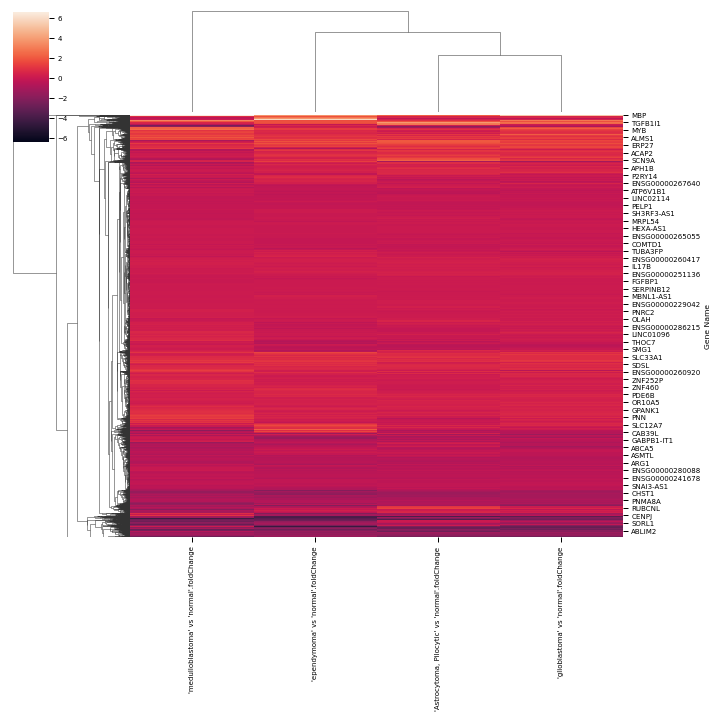

In [94]:
#Assign array to argument first to all data to be read
first=[]
#Assign arguments to read in gene expression for metastasized CNS cancer variants, clean out blank values with 0 
data = pd.read_csv("E_GEODlog2foldchangeall.csv",header=0, index_col=0)
data = data.fillna(0).astype(float)
genes = data.index
#Sanity check for loading in csv
print(data.head())
#Use seaborn as sns to set up the hierarichally clustered heat map for a paper
sns.set_context("paper", font_scale=0.8)
#Plot the heat map within a hierarichal cluster
sns_plot = sns.clustermap(data)
#Save the sns_plot as a pdf for safe-keeping
sns_plot.savefig("heatmap.pdf")
#Sanity check for showing plot
plt.show()

In [63]:
#Read in the appropriate csv files for oncogene regulation of metastasized CNS cancer variants
dfA=pd.read_csv('E_GEODvolcanodata10KA.csv',index_col=0) #pilocytic astrocytoma
dfE=pd.read_csv('E_GEODvolcanodata10KE.csv',index_col=0) #ependymoma
dfG=pd.read_csv('E_GEODvolcanodata10KG.csv',index_col=0) #glioblastoma
dfM=pd.read_csv('E_GEODvolcanodata10KM.csv',index_col=0) #medulloblastoma
#Clean out cns files for blanks with 0
dfA=dfA.fillna(0);dfE=dfE.fillna(0);dfG=dfG.fillna(0);dfM=dfM.fillna(0)
#Sanity check to print out dataframes
print(dfA.head());print(dfE.head());print(dfG.head());print(dfM.head())

           logFC      p_values
GeneNames                     
TSPAN6       1.9  1.733737e-10
TNMD         0.1  6.342689e-01
DPM1         0.0  0.000000e+00
SCYL3        0.2  5.638641e-01
C1orf112     1.1  4.566022e-05
           logFC      p_values
GeneNames                     
TSPAN6       3.2  1.325364e-19
TNMD         1.5  2.148884e-03
DPM1         0.2  2.669879e-01
SCYL3        0.2  4.200296e-01
C1orf112     1.0  2.591945e-05
           logFC      p_values
GeneNames                     
TSPAN6       1.8  3.958486e-10
TNMD         0.3  3.091539e-01
DPM1         0.6  1.881559e-03
SCYL3        0.2  5.710208e-01
C1orf112     1.7  2.606130e-07
           logFC  p_values
GeneNames                 
TSPAN6       1.2  0.000039
TNMD        -0.1  0.768523
DPM1         0.5  0.025792
SCYL3        0.4  0.176017
C1orf112     1.8  0.000002


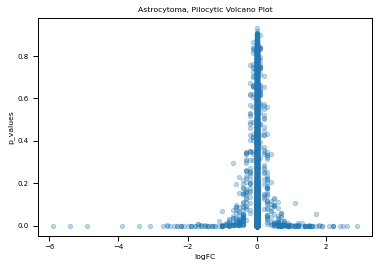

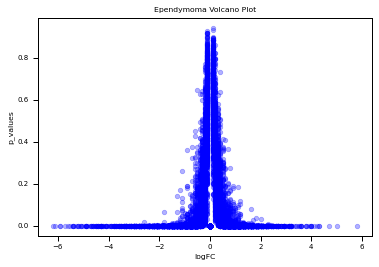

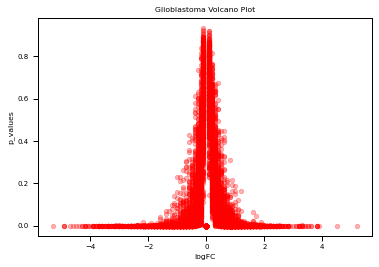

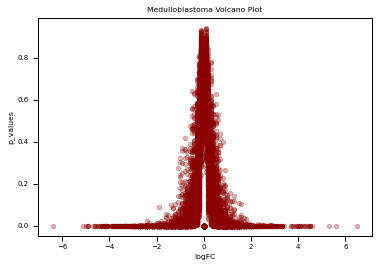

In [96]:
#Assign x as log2 fold changes and y as p-values to plot volcano plots, plot show when argument is set
volcanoA = dfA.plot.scatter(x='logFC',y='p_values',alpha=0.3,title='Astrocytoma, Pilocytic Volcano Plot')
volcanoE = dfE.plot.scatter(x='logFC',y='p_values',c='blue',alpha=0.3,title='Ependymoma Volcano Plot')
volcanoG = dfG.plot.scatter(x='logFC',y='p_values',c='red',alpha=0.3,title='Glioblastoma Volcano Plot')
volcanoM = dfM.plot.scatter(x='logFC',y='p_values',c='darkred',alpha=0.3,title='Medulloblastoma Volcano Plot')

## Analyzing the Results 

- Beginning with the hierarchically clustered heat map, the lower regions of the heat map indicate a significant level of down-regulation, as noted by the deeper hue of red, of the region's corresponding oncogenes for all metastasized CNS cancer variants; granted, while it is difficult to tell which specific oncogenes are in fact upregulated, the original EBI database visuals noted that the majority of oncogenes were significantly down-regulated for specificually medulloblastoma. Another region of notable down-regulation is clustered in the upper-middle area of the heat map, indicative of another set of down-regulated oncogenes. The remainder of the heat map is within the normal range (around 0 log2 fold changes) for oncogene expression; but notably, a thin region of up-regulated oncogenes, by the lighter yellow hue, is apparent for all metastasized CNS varient except pilocytic astrocytoma. This suggests that no single/immediate regulation pattern is apparent between oncogene expression and the metastasized CNS cancers; although, the hierarchical clustering suggests that the expression pattern for oncogenes are similar for pilocytic astrocytoma and glioblastoma, while both ependymoma and medulloblastoma are respectively further sepererate from the grouping-indicating seperate oncogene expression patterns.


- Moving on to the volcano plots for oncogene regulation (log2 fold changes and significance) when comparing metastasized CNS cancer variants to normal tissue samples, the general expression pattern remains similar between the plots regarding shape and trend of the oncogene expression welling toward the bottom to indicate less significance compared to the peak. Although, the spread of the plots, towards either the negative down-regulated end and positive up-regulated end for log2 fold changes, indicates the following for oncogene regulation: both ependymoma and medulloblastoma appear up-regulated upon comparison due to slight spread towards the positive end of the log2 fold changes axis, glioblastoma appear down-regulated due to the slight spread towards the negative end of the log2 fold changes axis, and pilocytic astrocytoma appears relatively neutral with no significant regulation for oncogene regulation.


- Altogether, the plots and analysis mainly point towards there being no specifc pattern for oncogene regulation for the complied genes and metastasized CNS cancer variants. This indicates that my hypothesis was disproven and that the null hypothesis (i.e., no pattern in oncogene regulatin) is more suitable/appropriate for the data.  